### Project
- JUMP Cell Painting Project
  - HP
  - https://jump-cellpainting.broadinstitute.org/
  - Github
  - https://github.com/jump-cellpainting/datasets

- Cell Painting Gallery
  - Journal, arxiv, 3 Feb 2024
  - https://arxiv.org/abs/2402.02203
  - AWS
  - https://registry.opendata.aws/cellpainting-gallery/
  - Documentation
  - https://github.com/broadinstitute/cellpainting-gallery 

### Folder structure  
https://github.com/broadinstitute/cellpainting-gallery/blob/main/folder_structure.md

```bash
cellpainting-gallery
└── <project>
    └── <project-specific-nesting>
        ├── images
        │   ├── YYYY_MM_DD_<batch-name>
        │   │   ├── illum　(照明補正されたデータ)
        │   │   │   ├── <plate-name>
        │   │   │   │   ├── <plate-name>_Illum<Channel>.npy
        │   │   │   │   └── <plate-name>_Illum<Channel>.npy
        │   │   │   └── <plate-name>
        │   │   └── images (生データ)
        │   │       ├── <full-plate-name>
        │   │       └── <full-plate-name>
        │   └── YYYY_MM_DD_<batch-name>
        ├── workspace
        └── workspace_dl
```
- project: top level folder for the project. Keep the name short and simple with [a-z0-9_] only.
- project-specific-nesting: additional nesting level that is typically an institution identifier. It can be anonymized (e.g. s3://cellpainting-gallery/cpg0016-jump/ contains source_1/, source_2/, etc.). It should be present even if the data is from a single source (e.g. s3://cellpainting-gallery/cpg0003-rosetta/ only contains broad/).
- images: all images and illumination correction functions.
- workspace: everything else that results from CellProfiler-based features goes here.
- workspace_dl: everything else that results from deep learning-based features goes here.

Within the outer images folder, there are YYYY_MM_DD_batch-name subfolders for each batch. Each batch folder should start with YYYY_MM_DD of the date that image acquisition started (or your best guess thereof). The rest of the batch folder name can be a simple ordinal (e.g. YYYY_MM_DD_Batch1) or more descriptive of its contents (e.g. 2020_01_02_TestPhalloidinConcentration). A single batch typically contains all of the plates that were imaged (or started acquisition) on that day. However, for simplifying project tracking and analysis, sometimes plates imaged on the same day are divided into multiple batches where each batch is a different experimental condition (e.g. 2020_01_02_LowPhalloidin and 2020_01_02_HighPhalloidin).


Arrayed Cell Painting experiments
Most Cell Painting experiments are arrayed, meaning that each well contains a single perturbation and therefore every cell within that well has the same perturbation. For arrayed experiments, within each YYYY_MM_DD_batch-name batch subfolder there is typically an illum and an images folder.

The images folder contains a full-plate-name folder for each plate imaged in that batch. The structure beneath the full-plate-name folder depends on your imager, but it should contain all the images from the plate, and perhaps some other related metadata generated by the imager.

The illum folder contains a plate-name folder for each plate imaged in that batch. The plate-name can match the full-plate-name or it can be truncated if the full-plate-name is long. Note that the relationship between full-plate-name and plate-name needs to be immediately obvious and the plate-name still needs to be a unique identifier (e.g. full-plate-name is BR00117035__2021-05-02T16_02_51-Measurement1 and plate-name is BRO00127035). Additionally, the plate-name used in the images folder must match that used in the workspace folder. Within each plate-name folder there are illumination correction functions for all channels imaged in that plate, as generated by CellProfiler. The illumination correction functions are named plate-name_IllumChannel.npy.

Note that the images folder contains the raw images as they come off of the microscope. Though images undergo manipulation before analysis (e.g. application of illumination correction functions), intermediate, processed images are not typically saved or uploaded. However, all of the information necessary to replicate the manipulation should be found in the project-specific-nesting folder (for a typical arrayed Cell Painting experiment this is just the illumination correction function). For atypical experiments in which the images undergo more extensive manipulation and for which replicating those manipulations is challenging or prohibitive, additional folders of images may be uploaded. Those folders will follow the format images_manipulation-description. The most common example of atypical image manipulation in an arrayed experiment is when images are acquired in z-stacks and then max-projected and saved as images_projected before undergoing analysis.

An example of what this looks like in practice for a typical arrayed Cell Painting experiment is below.

```bash
cellpainting-gallery
└── cpg0016-jump
    └── source_1
    └── source_2
    └── source_3
    └── source_4
        ├── images
        │   ├── 2021_04_26_Batch1
        │   │   ├── illum
        │   │   │   ├── BR00117035
        │   │   │   │   ├── BR00117035_IllumAGP.npy
        │   │   │   │   ├── BR00117035_IllumBrightfield.npy
        │   │   │   │   ├── BR00117035_IllumBrightfield_H.npy
        │   │   │   │   ├── BR00117035_IllumBrightfield_L.npy
        │   │   │   │   ├── BR00117035_IllumDNA.npy
        │   │   │   │   ├── BR00117035_IllumER.npy
        │   │   │   │   ├── BR00117035_IllumMito.npy
        │   │   │   │   └── BR00117035_IllumRNA.npy
        │   │   │   └── BR00117036
        │   │   └── images
        │   │       ├── BR00117035__2021-05-02T16_02_51-Measurement1
        │   │       └── BR00117036__2021-05-02T18_01_40-Measurement1
        │   └── 2021_05_31_Batch2
        └── workspace
```

- cpg0016-jump is the project folder.
- source_4 is the anonymized nesting folder, representing Broad's data. Note that there are multiple sources in this project, though a nesting folder is still required even if your project doesn't have multiple sources.
- 2021_04_26_Batch1 is the batch folder. Note that there are multiple batches of data acquired on different days in this project.
There are two plates in this example. BR00117035__2021-05-02T16_02_51-Measurement1 is the plate name as it comes off the microscope. This naming may differ with different microscopes and different acquisition configurations.
- BR00117035 is the truncated plate name that we have given to BR00117035__2021-05-02T16_02_51-Measurement1 that is used for naming the plate in the illum folder (and the workspace folder, discussed below).
- In the illum folder, within the BR00117035 plate folder, there are 8 separate illumination correction functions, one for each of the 8 channels imaged in that plate (e.g. BR00117035_IllumAGP.npy is the correction function for the AGP channel.)

### Filename structure
https://github.com/jump-cellpainting/2023_Chandrasekaran_submitted

The folder for each 384-well plate typically contains images from nine sites for each well (for some wells 7,8 or 16 sites were imaged). The (x,y) coordinates of sites are available in the ```Metadata_PositionX``` and ```Metadata_PositionY``` columns of the ```load_data.csv.gz``` files in the ```load_data_csv``` folder. There are eight images per site (five from the fluorescent channels and three brightfield images). The names of the image files follow the naming convention - ```rXXcXXfXXp01-chXXsk1fk1fl1.tiff``` where

- ```rXX``` is the row number of the well that was imaged. ```rXX``` ranges from ```r01``` to ```r16```.
- ```cXX``` is the column number of the well that was imaged. ```cXX``` ranges from ```c01``` to ```c24```.
- ```fXX``` corresponds to the site that was imaged. ```fXX``` ranges from ```f01``` to ```f16```.
- ```chXX``` corresponds to the fluorescent channels imaged. ```chXX``` ranges from ```ch01``` to ```ch08```.
  - ```ch01``` - Alexa 647
  - ```ch02``` - Alexa 568
  - ```ch03``` - Alexa 488 long
  - ```ch04``` - Alexa 488
  - ```ch05``` - Hoechst 33342
  - ```ch06-8``` - three brighfield z planes.


### Download

https://github.com/broadinstitute/cellpainting-gallery/blob/main/download_instructions.md

#### venv
```shell
python3 -m venv venv
source venv/bin/activate
pip install --upgrade pip
pip3 install awscli==1.32.45 boto3==1.34.45
```

In [33]:
### Listing all files ###
# aws s3 ls s3://cellpainting-gallery/cpg0003-rosetta/ --no-sign-request --recursive
import pprint
import boto3

# This allows access without needing AWS credentials
from botocore import UNSIGNED
from botocore.config import Config
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
paginator = s3.get_paginator('list_objects_v2')

#path='cpg0000-jump-pilot' #12.3TB ○ #e.g. 'cpg0000-jump-pilot/source_4/workspace/load_data_csv/2020_11_04_CPJUMP1/BR00116991'
#path='cpg0003-rosetta' #8.5GB
#path='cpg0010-caie-drugresponse' #239.2GB (蛍光のみ)
#path='cpg0015-heterogeneity' #204GB
#path='cpg0017-rohban-pathways' #321GB (蛍光のみ)
#path="cpg0019-moshkov-deepprofiler" #522GB
#path='cpg0030-gustafsdottir-cellpainting' #234GB

# Uses a paginator to allow listing of more than 1,000 objects
pages = paginator.paginate(Bucket='cellpainting-gallery', Prefix=path)
fullfile_list = []
for page in pages:
    for k in page['Contents']:
        fullfile_list.append(k['Key'])
file_list = [x.replace(f'{path}/','') for x in fullfile_list]

pprint.pprint(file_list)

# pages = paginator.paginate(
#     Bucket='cellpainting-gallery',
#     Delimiter='/',
#     Prefix=f"{path}/")
# fullprefix_list = []
# for page in pages:
#     for k in page['CommonPrefixes']:
#         fullprefix_list.append(k['Prefix'][:-1])
# folder_list = [x.replace(f'{path}/','') for x in fullprefix_list]

# pprint.pprint(fullprefix_list)
# pprint.pprint('*'*100)
# pprint.pprint(folder_list)

KeyboardInterrupt: 

# Datasets
補正

(1080, 1080)
(1080, 1080)


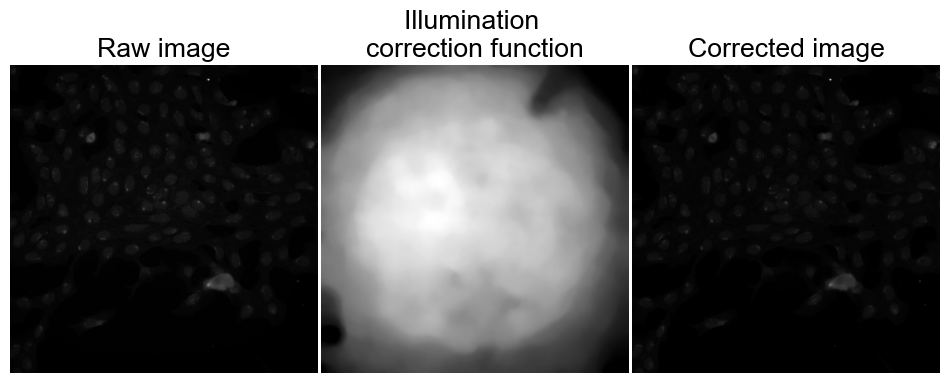

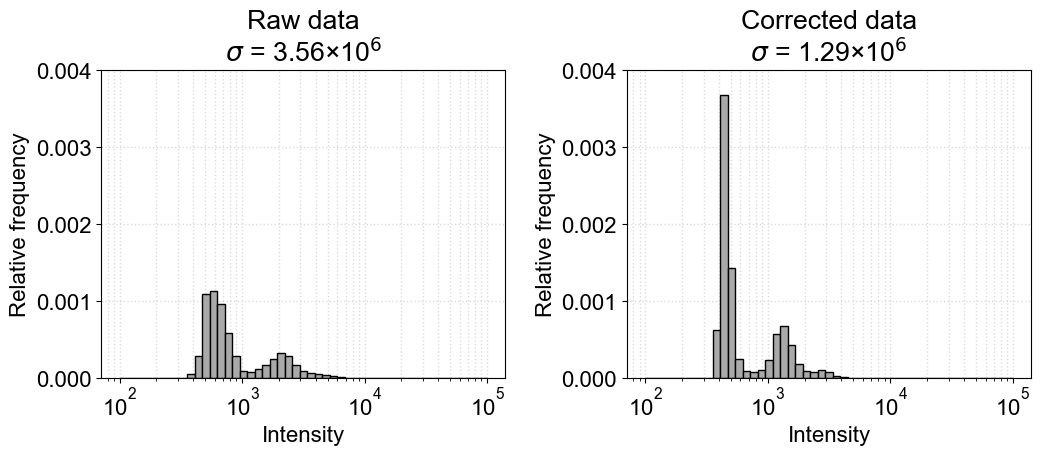

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16

img_path = '../datasets/JUMP/demo/images/BR00117010/r01c01f01p01-ch2sk1fk1fl1.tiff'
path = '../datasets/JUMP/demo/illum/BR00117010/BR00117010_IllumAGP.npy'
save_dir = './JUMP_corrected_image'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

img = io.imread(img_path)
print(img.shape)
illum_filter = np.load(path, allow_pickle=True)
print(illum_filter.shape)

img_filtered = img/illum_filter #np.dot(img,illum_filter)

fig = plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=0.01)
ax1 = fig.add_subplot(131)
ax1.imshow(img,cmap='gray')
ax1.set_axis_off()
ax1.set_title('Raw image')
ax2 = fig.add_subplot(132)
ax2.imshow(illum_filter,cmap='gray')
ax2.set_axis_off()
ax2.set_title('Illumination \ncorrection function')
ax3 = fig.add_subplot(133)
ax3.imshow(img_filtered,cmap='gray')
ax3.set_axis_off()
ax3.set_title('Corrected image')
plt.savefig(f"{save_dir}/corrected_images.png",dpi=600,bbox_inches="tight")
plt.savefig(f"{save_dir}/corrected_images.pdf",dpi=600,bbox_inches="tight")
plt.show()

img_std = np.std(img, ddof=0)
img_filtered_std = np.std(img_filtered, ddof=0)

img_var = np.var(img, ddof=0)
img_filtered_var = np.var(img_filtered, ddof=0)

from math import log10, floor
from decimal import Decimal, ROUND_HALF_UP

def decimalRound(num,sig=3):
    a=Decimal(str(num))
    dig="1E"+str((sig-int(floor(log10(abs(num))))-1)*-1)
    b = a.quantize(Decimal(dig), rounding=ROUND_HALF_UP)
    return str(b)

fig = plt.figure(figsize=(12,4))
#bins = 50
bins = np.logspace(2, 5, 50)
ylim = [0,0.004]
plt.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax1.hist(np.ravel(img), density=True, bins=bins,color='darkgray',edgecolor='black')
ax1.set_ylim(ylim)
text = decimalRound(img_var)
ax1.set_title('Raw data\n$\sigma$ = {}×10$^{}$'.format(text[0:4],text[-1]))
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Relative frequency')
ax1.grid(which='major',color="lightgray", linestyle="dotted", linewidth=1,alpha=0.8)
ax1.grid(which='minor',color="lightgray", linestyle="dotted", linewidth=1,alpha=0.8)
ax1.set_axisbelow(True)
ax1.set_xscale('log')
ax2 = fig.add_subplot(122)
ax2.hist(np.ravel(img_filtered), density=True, bins=bins,color='darkgray',edgecolor='black')
ax2.set_ylim(ylim)
text = decimalRound(img_filtered_var)
ax2.set_title('Corrected data\n$\sigma$ = {}×10$^{}$'.format(text[0:4],text[-1]))
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Relative frequency')
ax2.grid(which='major',color="lightgray", linestyle="dotted", linewidth=1,alpha=0.8)
ax2.grid(which='minor',color="lightgray", linestyle="dotted", linewidth=1,alpha=0.8)
ax2.set_axisbelow(True)
ax2.set_xscale('log')
plt.savefig(f"{save_dir}/corrected_images_histogram.png",dpi=600,bbox_inches="tight")
plt.savefig(f"{save_dir}/corrected_images_histogram.pdf",dpi=600,bbox_inches="tight")
plt.show()

255


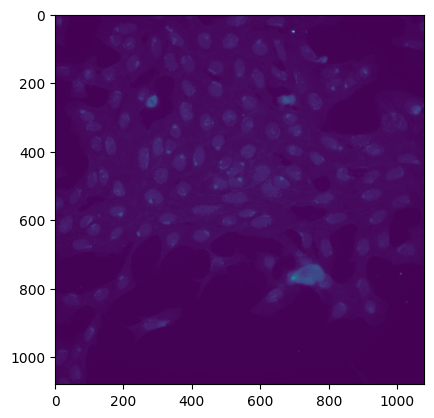

In [5]:
import os
import numpy as np
from skimage import io, img_as_uint, img_as_ubyte
from matplotlib import pyplot as plt

img_path = '../datasets/JUMP/demo/images/BR00117010/r01c01f01p01-ch2sk1fk1fl1.tiff'

img = img_as_ubyte(io.imread(img_path))
print(img.max())
fig = plt.figure()
plt.imshow(img)

In [9]:
import json
with open("/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/datasets/JUMP/build/channel_table.json", 'r') as f:
    channel_table = json.load(f)
print(channel_table)
print(channel_table['ch1'])

{'ch1': 'Mito', 'ch2': 'AGP', 'ch3': 'RNA', 'ch4': 'ER', 'ch5': 'DNA', 'ch6': 'HighZBF', 'ch7': 'LowZBF', 'ch8': 'Brightfield'}
Mito


In [1]:
import pandas as pd
import numpy as np
path = '/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/guidedI2I/trial_wellplate_epoch100_batch28/train_fold2_20240320-122149/test_A549_48h/result_at_each_image.csv'
df = pd.read_csv(path)
ssim = np.mean(df['ssim'])
print(ssim)

psnr = np.mean(df['psnr'])
print(psnr)

psnrs = df['psnr'].to_list()
a = [p for p in psnrs if p != np.inf]
print(len(psnrs))
print(len(a))
print(np.mean(a))

0.12190406416422712
inf
384
383
13.347200336266589
